In [1]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


In [135]:
# Open data file
file_dir = "./assets/original/A_Z_vol_count-all.txt"
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
df_original = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_original)
# Reorder columns
df_original = df_original[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Open data file
file_dir = "./assets/NC/A_Z_vol_count-all.txt"
df_NC = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_NC)
# Reorder columns
df_NC = df_NC[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Open data file
file_dir = "./assets/FTFP/A_Z_vol_count-all.txt"
df_FTFP = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_FTFP)
# Reorder columns
df_FTFP = df_FTFP[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Get total counts

Number of counts per physics model:
Percentage increase compared to original:
NC: 6.72
FTFP: 6.76


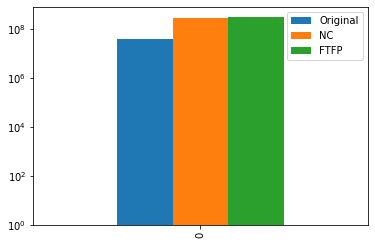

In [138]:
print("Number of counts per physics model:")
df_counts = pd.DataFrame({"Original": [df_original['Counts'].sum()],
                          "NC": [df_NC['Counts'].sum()],
                          "FTFP": [df_FTFP['Counts'].sum()]})
df_counts.plot.bar(log=True)
print("Percentage increase compared to original:")
print(f"NC: {round((df_NC['Counts'].sum() - df_original['Counts'].sum()) / df_original['Counts'].sum(), 2)}")
print(f"FTFP: {round((df_FTFP['Counts'].sum() - df_original['Counts'].sum()) / df_original['Counts'].sum(), 2)}")
plt.show()

# Ratio between volumes

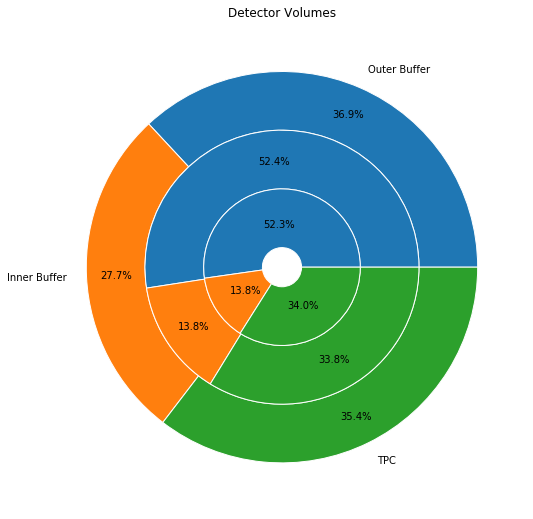

In [175]:
fig, ax = plt.subplots(figsize=(18,9))
size = 0.3
labels=["Outer Buffer", "Inner Buffer", "TPC"]
ax.pie(x=[df_original.loc[df_original["Detector Volume"] == 7,"Counts"].sum(),
           df_original.loc[df_original["Detector Volume"] == 9,"Counts"].sum(),
           df_original.loc[df_original["Detector Volume"] == 11,"Counts"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       labels=labels,
       radius=1,
       autopct='%1.1f%%',
       pctdistance=1 - size / 2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(x=[df_NC.loc[df_NC["Detector Volume"] == 7,"Counts"].sum(),
           df_NC.loc[df_NC["Detector Volume"] == 9,"Counts"].sum(),
           df_NC.loc[df_NC["Detector Volume"] == 11,"Counts"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       radius=1 - size, 
       autopct='%1.1f%%',
       pctdistance= 1 - 3 * size/4,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(x=[df_FTFP.loc[df_FTFP["Detector Volume"] == 7,"Counts"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 9,"Counts"].sum(),
           df_FTFP.loc[df_FTFP["Detector Volume"] == 11,"Counts"].sum()],
       colors = ['tab:blue', 'tab:orange', 'tab:green'],
       radius= 1-2 * size, 
       autopct='%1.1f%%',
       pctdistance=1 - 3 * size / 2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(title='Detector Volumes')
plt.show()

# Get yields of each isotope

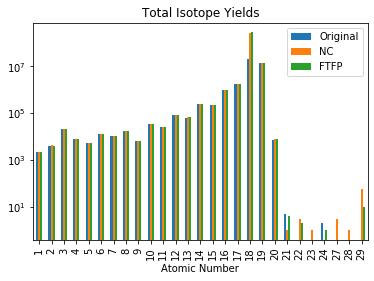

In [176]:
df_original_counts = df_original.groupby(['Atomic Number'])["Counts"].sum()
df_NC_counts = df_NC.groupby(['Atomic Number'])["Counts"].sum()
df_FTFP_counts = df_FTFP.groupby(['Atomic Number'])["Counts"].sum()
df_combined_counts = pd.concat([df_original_counts, df_NC_counts, df_FTFP_counts], axis=1).reset_index()
df_combined_counts.plot.bar(x="Atomic Number", log=True)
plt.legend(labels=["Original", "NC","FTFP"])
plt.title("Total Isotope Yields")
plt.show()

In [100]:
print("Ordered Isotope yields:\n")
print("Original:", list(df_original_counts.sort_values(ascending=False).index))
print("NC:      ", list(df_NC_counts.sort_values(ascending=False).index))
print("FTFP:    ", list(df_FTFP_counts.sort_values(ascending=False).index))6

Ordered Isotope yields:

Original: [18, 19, 17, 16, 14, 15, 12, 13, 10, 11, 3, 8, 6, 7, 4, 20, 9, 5, 2, 1, 21, 24]
NC:       [18, 19, 17, 16, 14, 15, 12, 13, 10, 11, 3, 8, 6, 7, 4, 20, 9, 5, 2, 1, 29, 22, 27, 28, 21, 23]
FTFP:     [18, 19, 17, 16, 14, 15, 12, 13, 10, 11, 3, 8, 6, 7, 4, 20, 9, 5, 2, 1, 29, 21, 22, 24]


# Compare important isotopes

In [125]:
df_original = pd.read_csv(f"./assets/original/important_iso.csv")
df_NC = pd.read_csv(f"./assets/NC/important_iso.csv")
df_FTFP = pd.read_csv(f"./assets/FTFP/important_iso.csv")
min_b_e = 0
max_b_e = 100
min_g_e = 10
max_g_e = 400

df_original_b = df_original[df_original[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]

df_NC_b = df_NC[df_NC[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]

df_FTFP_b = df_FTFP[df_FTFP[f"BDecay {min_b_e}-{max_b_e} (keV)"] == True]

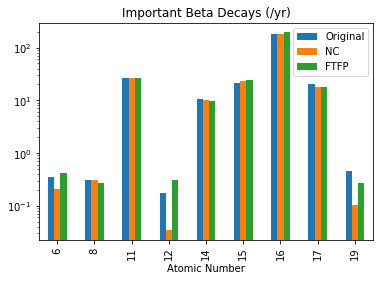

In [179]:
df_original_b_counts = df_original_b.groupby(['Atomic Number'])["Decays (/yr)"].sum()
df_NC_b_counts = df_NC_b.groupby(['Atomic Number'])["Decays (/yr)"].sum()
df_FTFP_b_counts = df_FTFP_b.groupby(['Atomic Number'])["Decays (/yr)"].sum()
temp = pd.concat([df_original_b_counts, df_NC_b_counts, df_FTFP_b_counts], axis=1).reset_index()
temp.plot.bar(x="Atomic Number", log=True)
plt.title("Important Beta Decays (/yr)")
plt.legend(labels=["Original", "NC","FTFP"])
plt.show()